In [27]:
#Dependencies for analysis with pandas and numpy
import pandas as pd
import numpy as np

#Dependencies for graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Dependencies for plotly
import plotly.graph_objs as plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#Dependencies for stat analysis with sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split


In [2]:
#Import data
wine_df = pd.read_csv('winemag-data_first150k.csv')
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


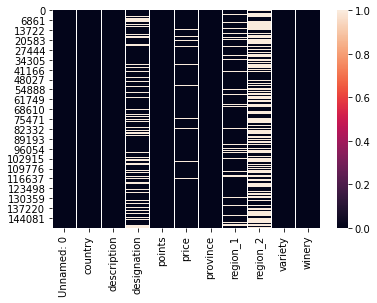

(150930, 11)

In [3]:
#Visualize the initial dataset
wine_df.info()
#See how many values are null
sns.heatmap(wine_df.isnull())
plt.show()
#See how many rows and columns
wine_df.shape

In [4]:
#get dupes information
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').count()

Unnamed: 0     92393
country        92390
description    92393
designation    64625
points         92393
price          83948
province       92390
region_1       76535
region_2       37386
variety        92393
winery         92393
dtype: int64

In [5]:
#Explore the duplicates
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').head(6)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
147725,147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
62345,62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
74993,74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
18803,18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
26530,26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister
84730,84730,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister


In [6]:
wine_df.shape

(150930, 11)

In [7]:
#Drop duplicates with the same description
wine_df2 = wine_df.drop_duplicates('description')
wine_df2.shape

(97821, 11)

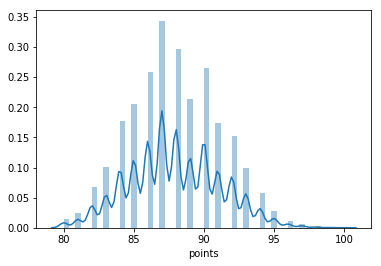

In [8]:
sns.distplot(wine_df['points'])
plt.show()

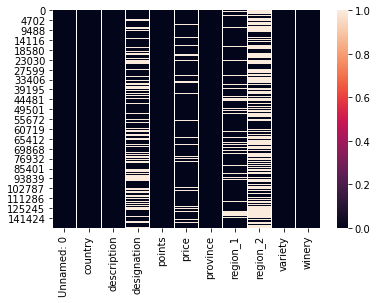

In [9]:
sns.heatmap(wine_df2.isnull())
plt.show()

In [10]:
wine_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 149639
Data columns (total 11 columns):
Unnamed: 0     97821 non-null int64
country        97818 non-null object
description    97821 non-null object
designation    67936 non-null object
points         97821 non-null int64
price          89108 non-null float64
province       97818 non-null object
region_1       81895 non-null object
region_2       39478 non-null object
variety        97821 non-null object
winery         97821 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 9.0+ MB


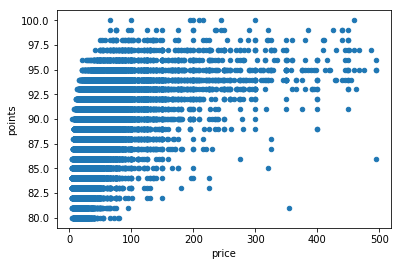

In [11]:
wine_df2[wine_df2['price'] < 500].plot.scatter(x='price', y='points')
plt.show()

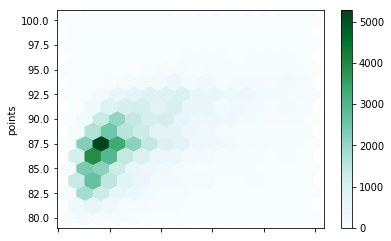

In [12]:
wine_df2[wine_df2['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
plt.show()

In [29]:
iplot([plotly.Scatter(x=wine_df2.head(1000)['points'], y=wine_df2.head(1000)['price'], mode='markers')])

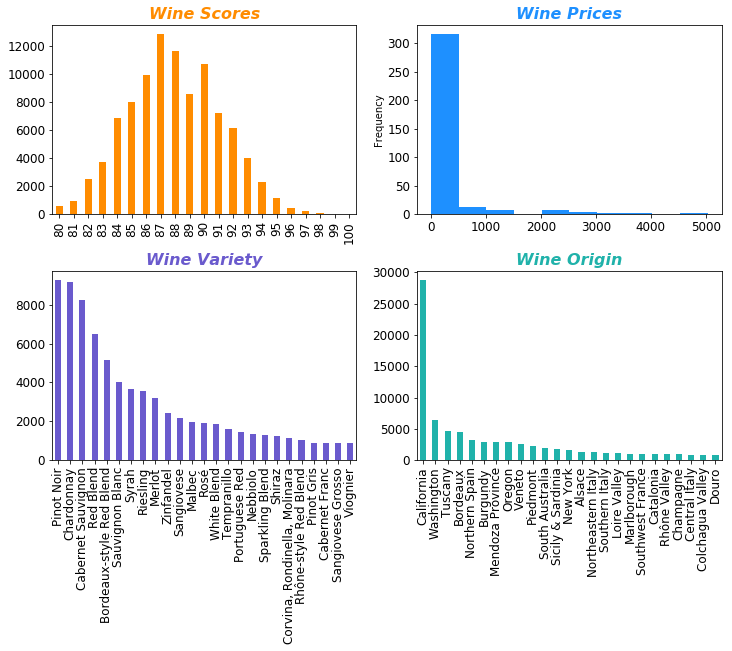

In [54]:
#subplots return 2 things: figure = fig and an array of the axes contained = axarr. Here are multiple rows and columns so the axes array becomes a list of lists 
#axarr
#fig
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

wine_df2['points'].value_counts().sort_index().plot.bar(ax=axarr[0][0], fontsize=12, color='darkorange')
axarr[0][0].set_title("Wine Scores", fontsize=16,style = 'italic', color ='darkorange', weight = 'bold')

wine_df2['price'].value_counts().plot.hist(ax=axarr[0][1], fontsize=12, color='dodgerblue')
axarr[0][1].set_title("Wine Prices", fontsize=16, style = 'italic', color ='dodgerblue', weight = 'bold')

wine_df2['variety'].value_counts().head(25).plot.bar(ax=axarr[1][0], fontsize=12, color='slateblue')
axarr[1][0].set_title("Wine Variety", fontsize=16, style = 'oblique', color ='slateblue', weight = 'bold')

wine_df2['province'].value_counts().head(25).plot.bar(ax=axarr[1][1], fontsize=12, color='lightseagreen')
axarr[1][1].set_title("Wine Origin", fontsize=16, style = 'italic', color = 'lightseagreen',  weight = 'bold')

plt.subplots_adjust(hspace=.3)
plt.show()

In [59]:
df = wine_df2['country'].replace("US", "United States").value_counts()

iplot([plotly.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])